# https://www.kaggle.com/c/digit-recognizer/
# with keras + resnet, scored 0.9785714285714285
# refer to https://github.com/broadinstitute/keras-resnet

In [121]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [122]:
# load csv files to numpy arrays

def load_data():
    train = pd.read_csv("train.csv")
    X_train = train.values[:,1:] 
    y_train = train.values[:,0]
    
    Pred_test = pd.read_csv("test.csv").values
    return X_train, y_train, Pred_test

def flush_predictons(predictions, output_name='out.csv'):
    '''
    predictions is a np.array of int 
    '''
    imgs = pd.Series(range(1,pred_test.shape[0]+1))
    imgd = pd.DataFrame(imgs)
    
    labeld = pd.DataFrame(predictions)
    out = pd.concat([imgd, labeld],axis=1)
    out.columns = ["ImageId", "Label"]
    out.to_csv(output_name, index = False)
    
x_train, y_train, pred_test = load_data()

In [123]:
print(x_train.shape, y_train.shape, pred_test.shape)

(42000, 784) (42000,) (28000, 784)


In [124]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.9, random_state=0)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(37800, 784) (37800,) (4200, 784) (4200,)


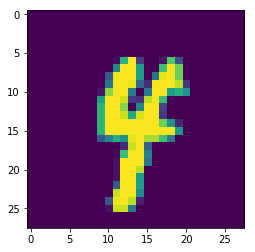

In [125]:
plt.imshow(x_train[4].reshape(28, 28))

In [126]:
# resolve tensorflow error: CUBLAS_STATUS_ALLOC_FAILED
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto(
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.6)
    # device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
set_session(session)

In [127]:
from keras import models, layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten, ZeroPadding2D, BatchNormalization
from keras.optimizers import RMSprop

In [128]:
# data preprocessing for keras CNN
x_train = x_train.reshape(x_train.shape[0], 28,28,1).astype('float32')/255
x_test  = x_test.reshape(x_test.shape[0], 28,28,1).astype('float32')/255
pred_test = pred_test.reshape(pred_test.shape[0], 28,28,1).astype('float32')/255

In [129]:
batch_size = 256
num_classes = 10
epochs = 50
pool_size=(2,2)

In [130]:
# one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [131]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(37800, 28, 28, 1) (37800, 10) (4200, 28, 28, 1) (4200, 10)


In [132]:
import keras_resnet.models

In [133]:
nets = 5
model = [0] *nets
for j in range(nets):
    x = keras.layers.Input(shape=(28,28,1,))
    model[j] = keras_resnet.models.ResNet101(x, classes=num_classes)
    model[j].compile(loss='categorical_crossentropy',
              optimizer="adadelta",#RMSprop(),
              metrics=['accuracy'])

In [134]:
#model.summary()

In [135]:
history = [0] * nets
for j in range(nets): 
    history[j] = model[j].fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))
    score = model[j].evaluate(x_test, y_test, verbose=0)
    print(j, 'Test loss:', score[0])
    print(j, 'Test accuracy:', score[1])

Train on 37800 samples, validate on 4200 samples
Epoch 1/50
37800/37800 [==============================] - 71s 2ms/step - loss: 14.5494 - acc: 0.0973 - val_loss: 14.6444 - val_acc: 0.0914
Epoch 2/50
37800/37800 [==============================] - 38s 996us/step - loss: 14.5494 - acc: 0.0973 - val_loss: 14.6444 - val_acc: 0.0914
Epoch 3/50
37800/37800 [==============================] - 38s 996us/step - loss: 14.5494 - acc: 0.0973 - val_loss: 14.6444 - val_acc: 0.0914
Epoch 4/50
37800/37800 [==============================] - 38s 1ms/step - loss: 14.5494 - acc: 0.0973 - val_loss: 14.6444 - val_acc: 0.0914
Epoch 5/50
37800/37800 [==============================] - 38s 1ms/step - loss: 14.5494 - acc: 0.0973 - val_loss: 14.6444 - val_acc: 0.0914
Epoch 6/50
37800/37800 [==============================] - 38s 1ms/step - loss: 14.5494 - acc: 0.0973 - val_loss: 14.6444 - val_acc: 0.0914
Epoch 7/50
37800/37800 [==============================] - 38s 1ms/step - loss: 14.5494 - acc: 0.0973 - val_loss: 

KeyboardInterrupt: 

In [ ]:
#pred = model.predict(pred_test)
#pred = np.argmax(pred, axis=1)

In [ ]:
results = np.zeros( (pred_test.shape[0],10) ) 
for j in range(nets):
    results = results + model[j].predict(pred_test)
results = np.argmax(results,axis = 1)

In [ ]:
flush_predictons(results, output_name='keras_resnet50e_10_50.csv')

In [ ]:
#model.save("keras_resnet.h5")
#from keras.models import load_model

#model = load_model("keras_resnet.h5")